In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from scipy import stats
import pylab

import warnings
warnings.filterwarnings('ignore')

In [312]:
df = pd.read_csv('employee_data.csv')

In [313]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [314]:
df.sample(6)

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
5018,257,engineering,NaN,0.914503,4,NaN,high,0.606451,Employed,2.0
9057,171,sales,NaN,0.640353,4,NaN,low,0.604266,Employed,3.0
12001,181,engineering,NaN,0.735859,3,NaN,medium,0.637364,Employed,2.0
11415,284,sales,NaN,0.790078,3,NaN,low,0.492806,Employed,10.0
6525,289,sales,NaN,0.907194,7,NaN,low,0.167997,Left,4.0
3231,173,marketing,NaN,0.822792,5,NaN,low,0.635227,Employed,3.0


In [315]:
df.shape

(14249, 10)

In [316]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [317]:
df.drop_duplicates(inplace=True)
df.shape

(14221, 10)

In [318]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

In [319]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12165
last_evaluation       1504
n_projects               0
recently_promoted    13921
salary                   0
satisfaction           153
status                   0
tenure                 153
dtype: int64

In [320]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


In [321]:
df['filed_complaint'].replace(np.nan, 0, inplace=True)
df['recently_promoted'].replace(np.nan, 0, inplace=True)

In [322]:
print(df.filed_complaint.unique())
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


In [323]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1504
n_projects              0
recently_promoted       0
salary                  0
satisfaction          153
status                  0
tenure                153
dtype: int64

In [324]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [325]:
df.department.unique()

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', nan, 'management',
       'information_technology', 'admin'], dtype=object)

In [326]:
df['department'].replace('information_technology', 'IT', inplace=True)

In [327]:
df = df[df['department'] != 'temp']

In [328]:
df.shape

(14068, 10)

In [329]:
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [330]:
department_mapping = {
    'engineering' : 0,
    'support' : 1,
    'sales' : 2,
    'IT' : 3,
    'product' : 4,
    'marketing' : 5,
    'procurement' : 6,
    'finance' : 7,
    'management' : 8,
    'admin' : 9
}

df['department'] = df['department'].map(department_mapping)

In [331]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [332]:
salary_mapping = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df['salary'] = df['salary'].map(salary_mapping)

In [333]:
df.status.unique()

array(['Left', 'Employed'], dtype=object)

In [334]:
status_mapping = {
    'Left' : 1,
    'Employed' : 0
}

df['status'] = df['status'].map(status_mapping)

In [335]:
df.describe()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,14068.000000,13359.000000,14068.000000,12717.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,2.552362,0.143944,0.718477,3.801038,0.021325,0.592764,0.621295,0.239338,3.497228
std,49.959962,2.315559,0.351045,0.173062,1.236058,0.144470,0.635435,0.250469,0.426694,1.460917
min,96.000000,0.000000,0.000000,0.316175,2.000000,0.000000,0.000000,0.040058,0.000000,2.000000
25%,156.000000,1.000000,0.000000,0.563866,3.000000,0.000000,0.000000,0.450390,0.000000,3.000000
50%,200.000000,2.000000,0.000000,0.724939,4.000000,0.000000,1.000000,0.652527,0.000000,3.000000
75%,245.000000,4.000000,0.000000,0.871358,5.000000,0.000000,1.000000,0.824951,0.000000,4.000000
max,310.000000,9.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,1.000000,10.000000


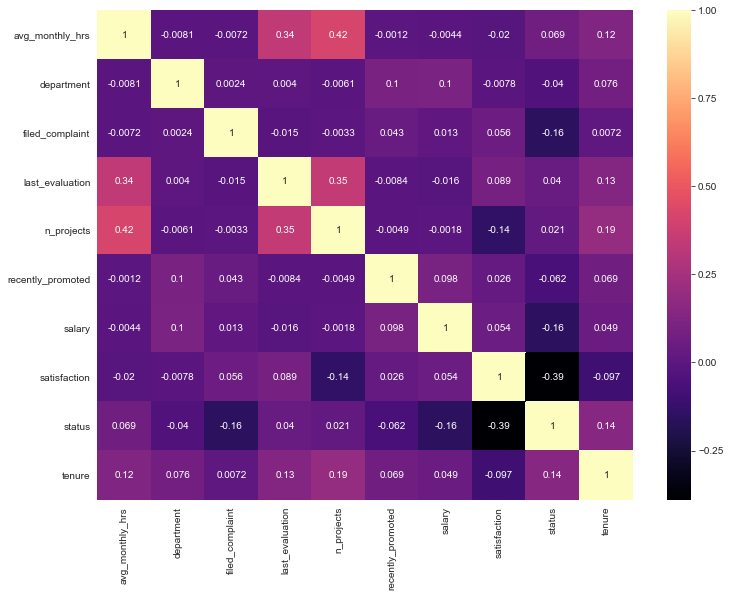

In [336]:
fig = plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot=True, cmap='magma')

In [337]:
df['department'] = df['department'].fillna(df['department'].mode().iloc[0])

In [338]:
df['n_projects'].value_counts()

4    4070
3    3796
5    2590
2    2265
6    1104
7     243
Name: n_projects, dtype: int64

In [339]:
dummy_mapping = {
    2 : 0, 3 : 0,
    4 : 1, 5 : 1,
    6 : 2, 7 : 2
}

df['dummy_project'] = df['n_projects'].map(dummy_mapping)

In [340]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dummy_project
0,221,0.0,0.0,0.932868,4,0.0,0,0.829896,1,5.0,1
1,232,1.0,0.0,NaN,3,0.0,0,0.834544,0,2.0,0
2,184,2.0,0.0,0.788830,3,0.0,1,0.834988,0,3.0,0
3,206,2.0,0.0,0.575688,4,0.0,0,0.424764,0,2.0,1
4,249,2.0,0.0,0.845217,3,0.0,0,0.779043,0,3.0,0


In [341]:
df['last_evaluation'].fillna(df.groupby('dummy_project')['last_evaluation'].transform('mean'), inplace=True)

In [343]:
def mainplot(col):
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    sns.distplot(df[col])
    
    plt.subplot(1,3,2)
    stats.probplot(df[col], plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[col])

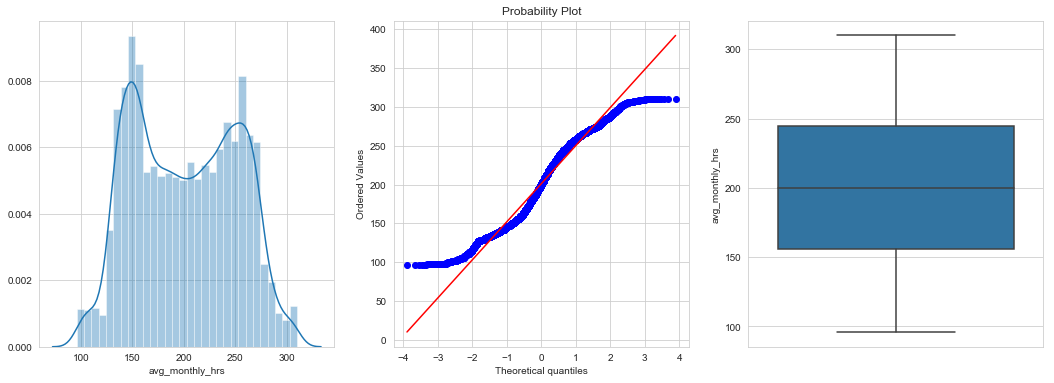

In [344]:
mainplot('avg_monthly_hrs')

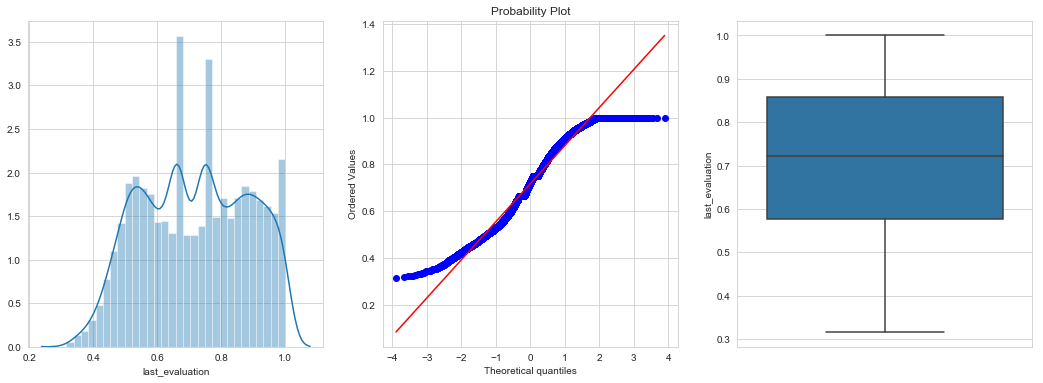

In [345]:
mainplot('last_evaluation')

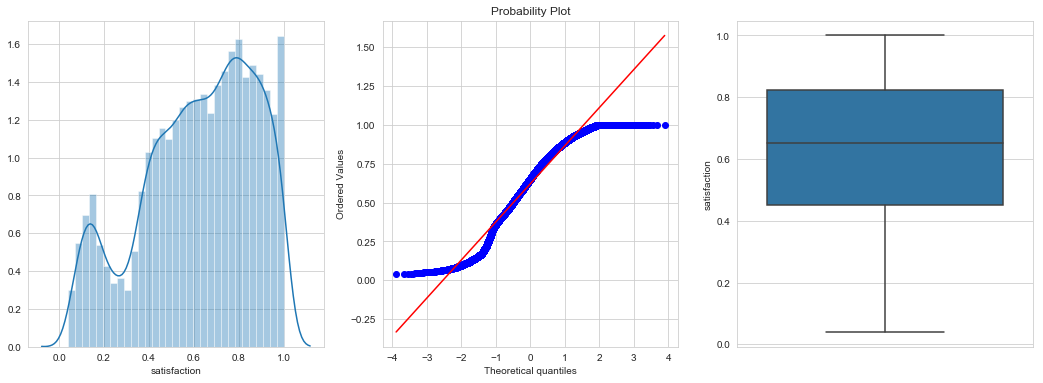

In [347]:
mainplot('satisfaction')